The csv file is included in the repo. If you want to regenerate it, you need to download the data for Tamayo et al. (2020) at https://zenodo.org/record/3723292#.X20Jjy2ZPVs

In [1]:
import rebound
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pymc3 as pm
import scipy
from scipy.integrate import quad
from itertools import cycle
from multiprocessing import Pool
from celmech import Andoyer

plt.style.use('paper.mplstyle')
%matplotlib inline

from spock import FeatureClassifier

def init_classifier():
    global model
    model = FeatureClassifier()

def populate(row): # Assumes inner two near 3:2 and outer two near 7:5 like in Kepler23
    safilename = '../../spock/data/TTVsystems/KOI-1576/simulation_archives/runs/sa{0}'.format(row['runstring'])
    sa = rebound.SimulationArchive(safilename)
    sim = sa[0]
    P1 = sim.particles[1].P
    
    # celmech Use j:j-k specific to Kepler 307
    avars12 = Andoyer.from_Simulation(sim, j=5, k=1, i1=1, i2=2) # need to set j and k for appropriate j:j-k MMR
    row['Mstar'] = sim.particles[0].m
    row['Z12'] = avars12.Z
    avars23 = Andoyer.from_Simulation(sim, j=3, k=1, i1=2, i2=3)
    row['Z23'] = avars23.Z
    
    # Add other quantities of interest
    row['mu1'] = sim.particles[1].m/sim.particles[0].m
    row['mu2'] = sim.particles[2].m/sim.particles[0].m
    row['mu3'] = sim.particles[3].m/sim.particles[0].m
    row['e1'] = sim.particles[1].e
    row['e2'] = sim.particles[2].e
    row['e3'] = sim.particles[3].e
    row['h1'] = sim.particles[1].e*np.sin(sim.particles[1].pomega)
    row['h2'] = sim.particles[2].e*np.sin(sim.particles[2].pomega)
    row['h3'] = sim.particles[3].e*np.sin(sim.particles[3].pomega)
    row['k1'] = sim.particles[1].e*np.cos(sim.particles[1].pomega)
    row['k2'] = sim.particles[2].e*np.cos(sim.particles[2].pomega)
    row['k3'] = sim.particles[3].e*np.cos(sim.particles[3].pomega)
    hcom = (row['mu1']*row['h1'] + row['mu2']*row['h2'] + row['mu3']*row['h3'])/(row['mu1']+row['mu2']+row['mu3'])
    kcom = (row['mu1']*row['k1'] + row['mu2']*row['k2'] + row['mu3']*row['k3'])/(row['mu1']+row['mu2']+row['mu3'])
    row['ecom'] = np.sqrt(hcom**2 + kcom**2)
    row['spockprob'] = model.predict_stable(sim)

    return row

In [2]:
%%time
try:
    df = pd.read_csv('../csvs/Kepler-307.csv', index_col=0)
except:
    path = '../data/TTVsystems/KOI-1576/simulation_archives/runs/'
    df = pd.read_csv('../../spock/training_data/TTVsystems/KOI-1576/labels.csv', index_col=0)
    df.tail()
    pool = Pool(processes=48, initializer=init_classifier)
    res = pool.map(populate, [r for i, r in df.iterrows()])
    df = pd.DataFrame(res)
    df.to_csv('../csvs/Kepler-307.csv')

/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:86: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:86: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:132: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:86: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/

/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:132: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:86: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:132: RuntimeWarning: Encountered unkown field in file. File might have been saved with a different version of REBOUND.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:132: RuntimeWarning: Encountered unkown field in file. File might have been saved with a different version of REBOUND.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton

/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:86: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:132: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:132: RuntimeWarning: Encountered unkown field in file. File might have been saved with a different version of REBOUND.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:132: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/w

/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:86: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:132: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:132: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:132: RuntimeWarning: Encountered unkown field in file. File might have been saved with a different version of REBOUND.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/w

/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:86: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:132: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:132: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:132: RuntimeWarning: Encountered unkown field in file. File might have been saved with a different version of REBOUND.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/w

/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:132: RuntimeWarning: Encountered unkown field in file. File might have been saved with a different version of REBOUND.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:86: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:132: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:86: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/work

/home/dtamayo/miniconda3/envs/ml/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/home/dtamayo/miniconda3/envs/ml/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/home/dtamayo/miniconda3/envs/ml/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/home/dtamayo/miniconda3/envs/ml/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/home/dtamayo/miniconda3/envs/ml/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/home/dtamayo/miniconda3/envs/ml/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r 

CPU times: user 1.38 s, sys: 672 ms, total: 2.05 s
Wall time: 1min 39s


# 95% of samples have spockprob > 0.34 (threshold used in Tamayo et al 2020)

In [3]:
(df.spockprob > 0.34).sum()/1500

0.952

In [4]:
def calcHPDI(vals, interval, guess, weights=None):
    '''
    Fit a gaussian KDE, find max likelihood, and calculate 
    minimum interval that holds `interval` percentage of the distribution.
    This is what Hadden 2017 quote

        vals : array of values
        interval: float for size of interval
        guess: initial guess for max likelihood
    '''
    vals = np.concatenate([vals, vals*(-1)]) # reflect values to negative to avoid edge effects at zero
    try:
        weights=np.concatenate([weights, weights])
    except:
        pass
    
    kde = scipy.stats.gaussian_kde(vals, bw_method=1/15, weights=weights)
    maxlike = scipy.optimize.fmin(lambda x: -kde(x), x0=guess, disp=False)[0]
    
    sample = kde.resample(10000, seed=0) # need to do this step in case we need to weight the vals by weights (for SPOCK probs)
    samplecut = sample[sample > 0]

    low, high = pm.stats.hpd(samplecut, credible_interval=interval)
    return kde, maxlike, high, low

def plot(ax, df, col, xlabel, bins, labels=False, moresig=False):
    
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = cycle(prop_cycle.by_key()['color'])
    _ = next(colors) # skip color to match other plots

    nbody = df[(df['instability_time']>9.99e8)]
    label = "$10^9$ N-body Orbits\n" if labels else ""
    vals, edges = np.histogram(nbody[col], density=True, bins=bins)
    
    kde, maxlike, high, low = calcHPDI(nbody[col], interval=0.683, guess=0.1)
    if np.abs(low) >= 0.005:
        if moresig:
            label += "[{0:.3f}, {1:.3f}]".format(low, high)
        else:
            label += "[{0:.2f}, {1:.2f}]".format(low, high)
    else:
        if moresig:
            label += "[0, {0:.3f}]".format(high)
        else:
            label += "[0, {0:.2f}]".format(high)
    ax.bar(edges[:-1], vals, width=np.diff(edges), color = next(colors), alpha=0.5, label=label, ec='', align='edge')

    _ = next(colors) # skip color to match other plots
    _ = next(colors) # skip color to match other plots
    
    label = "SPOCK\n" if labels else ""
    vals, edges = np.histogram(df[col], density=True, bins=edges, weights=df.spockprob)
    
    kde, maxlike, high, low = calcHPDI(df[col], interval=0.683, guess=0.1, weights=df.spockprob)
    if np.abs(low) >= 0.005:
        if moresig:
            label += "[{0:.3f}, {1:.3f}]".format(low, high)
        else:
            label += "[{0:.2f}, {1:.2f}]".format(low, high)
    else:
        if moresig:
            label += "[0, {0:.3f}]".format(high)
        else:
            label += "[0, {0:.2f}]".format(high)
    
    ax.bar(edges[:-1], vals, width=np.diff(edges), color = next(colors), alpha=0.5, label=label, ec='', align='edge')

    ax.set_xlabel(xlabel)
    ax.set_xlim([bins.min(),bins.max()])

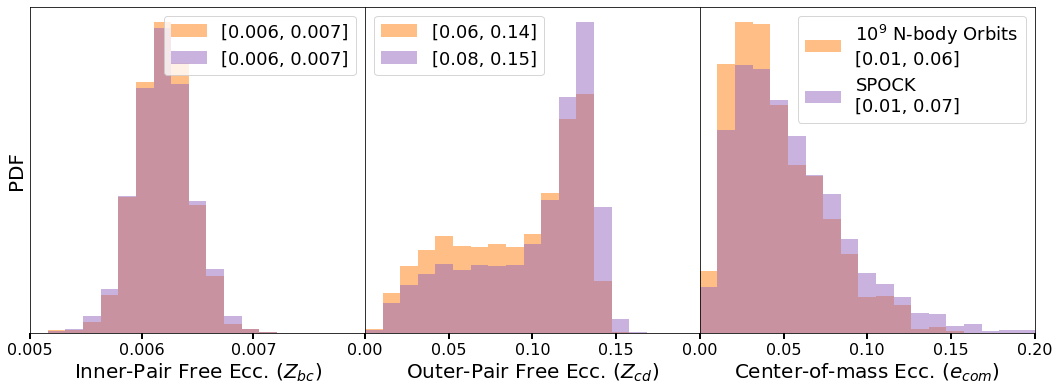

In [5]:
fig, axarr = plt.subplots(ncols=3, figsize=(18,6))
plt.subplots_adjust(wspace=0)

plot(axarr[0], df, 'Z12', 'Inner-Pair Free Ecc. ($Z_{bc}$)', bins = np.linspace(0.005, 0.008, 20), moresig=True)
plot(axarr[1], df, 'Z23', 'Outer-Pair Free Ecc. ($Z_{cd}$)', bins = np.linspace(0, 0.2, 20))
plot(axarr[2], df, 'ecom', 'Center-of-mass Ecc. ($e_{com}$)', bins = np.linspace(0, 0.2, 20), labels=True)

for ax in axarr.flatten():
    ax.axes.yaxis.set_ticks([])
    ax.legend(fontsize=18)

axarr[0].set_ylabel('PDF')
axarr[0].set_xticks([0.005, 0.006, 0.007])
axarr[1].set_xticks([0, 0.05, 0.1, 0.15])
axarr[2].set_xticks([0, 0.05, 0.1, 0.15, 0.2])

fig.savefig('kepler307.pdf', bbox_inches='tight')

In [6]:
df.spockprob.sum()

1121.3968872465193

In [7]:
df.Stable.sum()

967

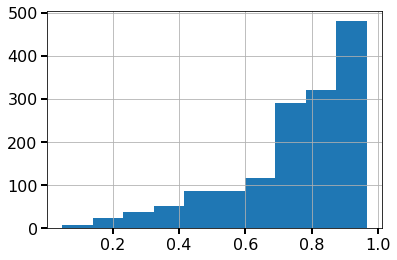

In [8]:
df['spockprob'].hist()

(0, 1)

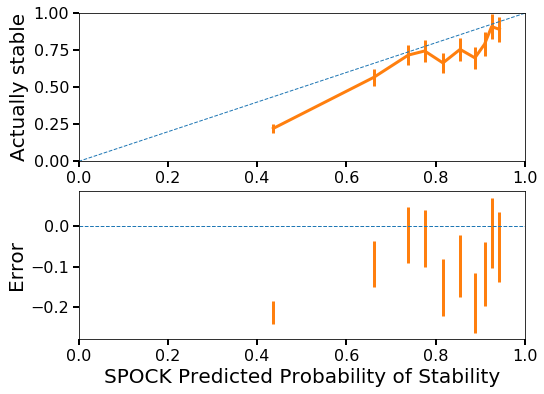

In [9]:
Nbins=10
df = df.sort_values(by='spockprob')
sortedpreds = df.spockprob
testy = df.instability_time > 9.99e8

cdf = np.cumsum(sortedpreds)/sortedpreds.sum()
edges = np.linspace(0,1,Nbins+1)
idx = np.searchsorted(cdf, edges)
probedges = sortedpreds.iloc[idx].values

hist, edges = np.histogram(sortedpreds, bins=probedges)

bincenters = np.array([sortedpreds.iloc[idx[i]:idx[i+1]].median() for i in range(len(idx)-1)])

fracstable = []
errorbars = []
for i in range(len(edges)-1):
    mask = (sortedpreds > edges[i]) & (sortedpreds <= edges[i+1])
    nstable = testy[mask].sum()
    fracstable.append(nstable/hist[i]) # fraction of stable systems in bin with predictions in range
    errorbars.append(np.sqrt(nstable)/hist[i])
fig, ax = plt.subplots(nrows=2, figsize=(8,6))
ax[0].plot(np.linspace(0,1,100), np.linspace(0,1,100), '--', lw=1)
ax[0].errorbar(bincenters, fracstable, errorbars)
ax[0].set_xlim([0,1])
ax[0].set_ylim([0,1])
ax[0].set_ylabel('Actually stable')

ax[1].plot(np.linspace(0,1,100), np.zeros(100), '--', lw=1)
ax[1].errorbar(bincenters, fracstable-bincenters, errorbars, linestyle='')
ax[1].set_xlabel('SPOCK Predicted Probability of Stability')
ax[1].set_ylabel('Error')
ax[1].set_xlim([0,1])
